🚀 Starting Complete Analysis...
📊 Loading data...
Dataset shape: (5000, 18)
Target distribution:
PULMONARY_DISEASE
NO     2963
YES    2037
Name: count, dtype: int64
🔧 Preprocessing...
🌲 Training Random Forest...
✅ Model trained successfully!
📊 Evaluating model...
✅ Accuracy: 0.9050
✅ Precision: 0.8805
✅ Recall: 0.8870
✅ F1-Score: 0.8837
✅ ROC-AUC: 0.9226

📋 Confusion Matrix:
True Negatives: 544, False Positives: 49
False Negatives: 46, True Positives: 361

📊 Creating Visualizations...


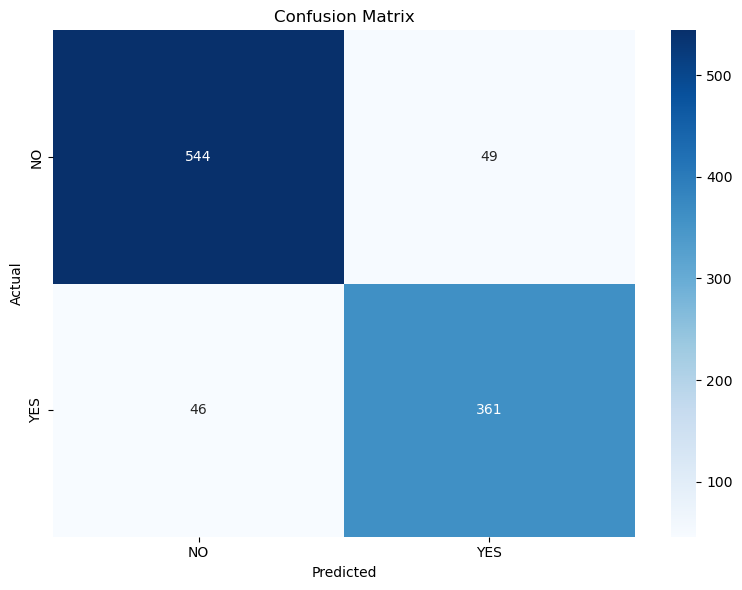

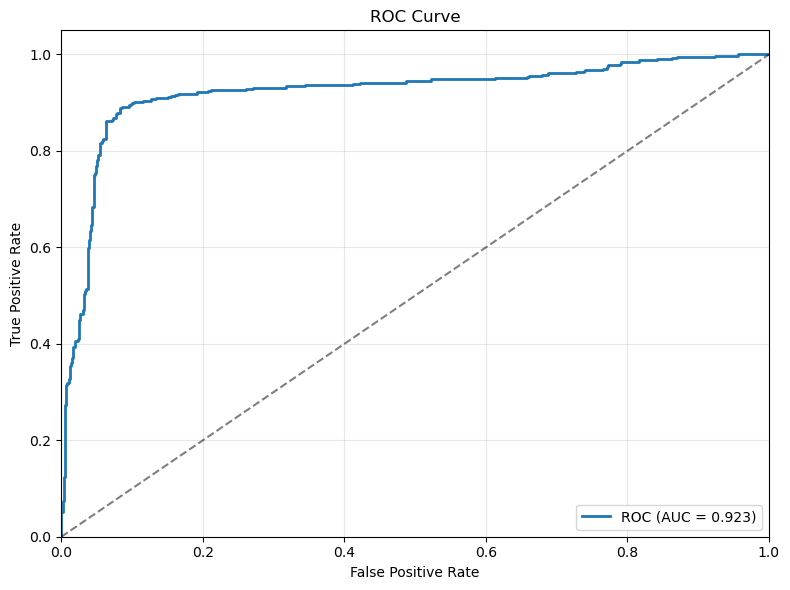

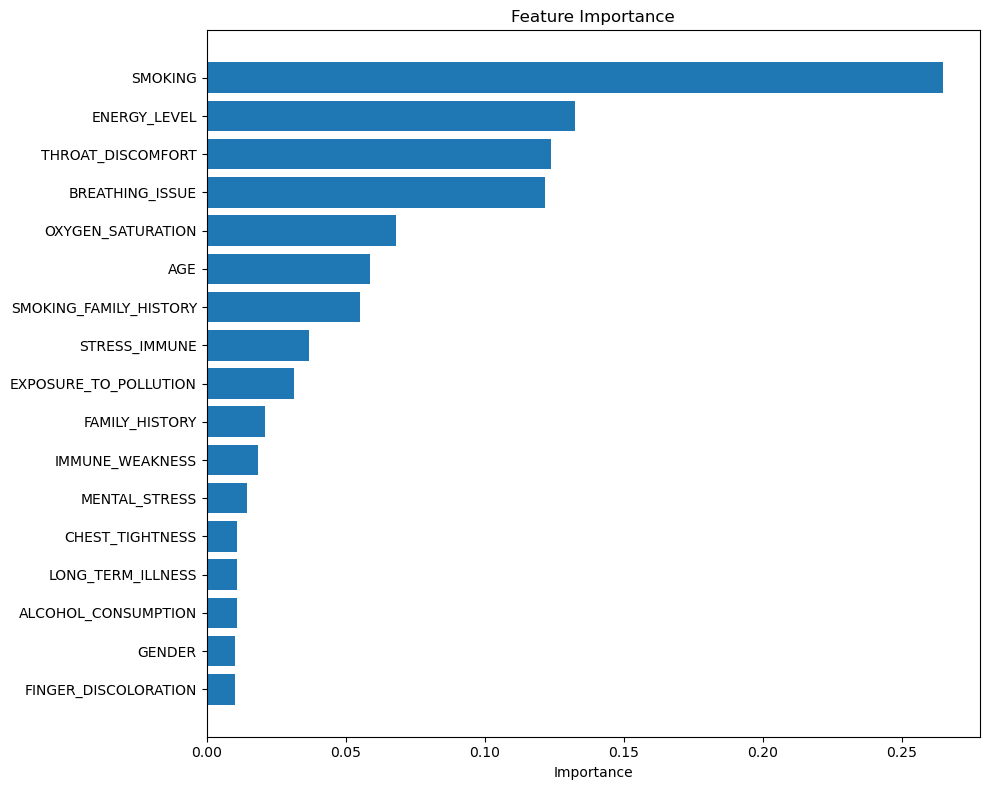


🎯 Feature Importance Rankings:
SMOKING: 0.2649
ENERGY_LEVEL: 0.1324
THROAT_DISCOMFORT: 0.1239
BREATHING_ISSUE: 0.1216
OXYGEN_SATURATION: 0.0680
AGE: 0.0587
SMOKING_FAMILY_HISTORY: 0.0552
STRESS_IMMUNE: 0.0367
EXPOSURE_TO_POLLUTION: 0.0315
FAMILY_HISTORY: 0.0209
IMMUNE_WEAKNESS: 0.0183
MENTAL_STRESS: 0.0146
CHEST_TIGHTNESS: 0.0110
LONG_TERM_ILLNESS: 0.0110
ALCOHOL_CONSUMPTION: 0.0109
GENDER: 0.0101
FINGER_DISCOLORATION: 0.0101
🔍 Generating SHAP summary plot...


<Figure size 1000x800 with 0 Axes>

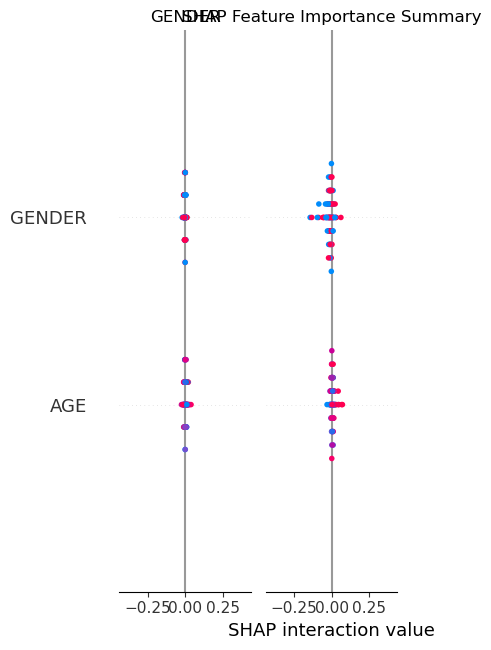

🔍 Generating SHAP explanations...
✅ SHAP values computed for 100 samples

📋 Individual Predictions Analysis:

📌 Sample 0 Predicted Probability : 0.1107
Predicted Class : NO
Actual Class : NO
Top Contributing Features:
AGE +0.0000 (↓)
GENDER +0.0000 (↓)
SMOKING +0.0000 (↓)
FINGER_DISCOLORATION +0.0000 (↓)
MENTAL_STRESS +0.0000 (↓)
EXPOSURE_TO_POLLUTION +0.0000 (↓)
LONG_TERM_ILLNESS +0.0000 (↓)
ENERGY_LEVEL +0.0000 (↓)
IMMUNE_WEAKNESS +0.0000 (↓)
BREATHING_ISSUE +0.0000 (↓)
--------------------------------------------------

📌 Sample 1 Predicted Probability : 0.3480
Predicted Class : NO
Actual Class : NO
Top Contributing Features:
AGE +0.0000 (↓)
GENDER +0.0000 (↓)
SMOKING +0.0000 (↓)
FINGER_DISCOLORATION +0.0000 (↓)
MENTAL_STRESS +0.0000 (↓)
EXPOSURE_TO_POLLUTION +0.0000 (↓)
LONG_TERM_ILLNESS +0.0000 (↓)
ENERGY_LEVEL +0.0000 (↓)
IMMUNE_WEAKNESS +0.0000 (↓)
BREATHING_ISSUE +0.0000 (↓)
--------------------------------------------------

📌 Sample 2 Predicted Probability : 0.7902
Predicted 

In [23]:
# Cell 1: Training and Saving Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

warnings.filterwarnings('ignore')
plt.style.use('default')

class PulmonaryDiseasePredictor:
    def __init__(self, data_path, model_save_dir="pulmonary_model"):
        self.data_path = data_path
        self.model_save_dir = model_save_dir
        self.df = None
        self.model = None
        self.scaler = None
        self.le = None
        self.feature_names = None
        self.results = None
        
        # Create model directory if it doesn't exist
        if not os.path.exists(self.model_save_dir):
            os.makedirs(self.model_save_dir)
        
    def load_data(self):
        """Load and prepare data"""
        print("📊 Loading data...")
        self.df = pd.read_csv(self.data_path)
        print(f"Dataset shape: {self.df.shape}")
        print(f"Target distribution:\n{self.df['PULMONARY_DISEASE'].value_counts()}")
        
    def preprocess(self):
        """Quick preprocessing"""
        print("🔧 Preprocessing...")
        
        # Encode target
        self.le = LabelEncoder()
        y = self.le.fit_transform(self.df['PULMONARY_DISEASE'])
        
        # Prepare features
        X = self.df.drop('PULMONARY_DISEASE', axis=1)
        self.feature_names = X.columns.tolist()
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Scale numerical features
        numerical_cols = ['AGE', 'ENERGY_LEVEL', 'OXYGEN_SATURATION']
        existing_numerical_cols = [col for col in numerical_cols if col in X.columns]
        
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
        
        if existing_numerical_cols:
            self.scaler = StandardScaler()
            X_train_scaled[existing_numerical_cols] = self.scaler.fit_transform(X_train[existing_numerical_cols])
            X_test_scaled[existing_numerical_cols] = self.scaler.transform(X_test[existing_numerical_cols])
        
        return X_train_scaled, X_test_scaled, y_train, y_test
        
    def train_model(self, X_train, y_train):
        """Train Random Forest"""
        print("🌲 Training Random Forest...")
        
        self.model = RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            class_weight='balanced',
            random_state=42,
            n_jobs=1
        )
        
        self.model.fit(X_train, y_train)
        print("✅ Model trained successfully!")
        
    def evaluate(self, X_test, y_test):
        """Evaluate model performance"""
        print("📊 Evaluating model...")
        
        y_pred = self.model.predict(X_test)
        y_prob = self.model.predict_proba(X_test)[:, 1]
        
        # Metrics
        self.results = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_prob)
        }
        
        print(f"✅ Accuracy: {self.results['accuracy']:.4f}")
        print(f"✅ Precision: {self.results['precision']:.4f}")
        print(f"✅ Recall: {self.results['recall']:.4f}")
        print(f"✅ F1-Score: {self.results['f1']:.4f}")
        print(f"✅ ROC-AUC: {self.results['roc_auc']:.4f}")
        
        # Confusion Matrix (text only)
        cm = confusion_matrix(y_test, y_pred)
        print(f"\n📋 Confusion Matrix:")
        print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
        print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")
        
        return self.results, y_pred, y_prob
    
    def plot_confusion_matrix(self, y_test, y_pred):
        """Plot confusion matrix separately"""
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=self.le.classes_, 
                    yticklabels=self.le.classes_)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.savefig(f'{self.model_save_dir}/confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def plot_roc_curve(self, y_test, y_prob):
        """Plot ROC curve separately"""
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_test, y_prob):.3f})', linewidth=2)
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'{self.model_save_dir}/roc_curve.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def plot_feature_importance(self):
        """Plot feature importance separately"""
        plt.figure(figsize=(10, 8))
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=True)
        
        plt.barh(importance_df['feature'], importance_df['importance'])
        plt.xlabel('Importance')
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.savefig(f'{self.model_save_dir}/feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Also save as text
        print("\n🎯 Feature Importance Rankings:")
        for idx, row in importance_df.sort_values('importance', ascending=False).iterrows():
            print(f"{row['feature']}: {row['importance']:.4f}")
        
    def plot_shap_summary(self, X_test):
        """Plot SHAP summary separately"""
        print("🔍 Generating SHAP summary plot...")
        
        # Use smaller sample for SHAP
        if len(X_test) > 100:
            sample_idx = np.random.choice(len(X_test), 100, replace=False)
            X_sample = X_test.iloc[sample_idx]
        else:
            X_sample = X_test
            
        # SHAP explainer
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(X_sample)
        
        if isinstance(shap_values, list):
            shap_vals = shap_values[1]  # Positive class
        else:
            shap_vals = shap_values
        
        # Create SHAP summary plot
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_vals, X_sample, feature_names=self.feature_names, show=False)
        plt.title('SHAP Feature Importance Summary')
        plt.tight_layout()
        plt.savefig(f'{self.model_save_dir}/shap_summary.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return shap_vals, X_sample
        
    def explain_with_shap(self, X_test, y_test, n_samples=5):
        """SHAP explanations - text only"""
        print("🔍 Generating SHAP explanations...")
        
        # Use a small sample for faster computation
        if len(X_test) > 100:
            sample_idx = np.random.choice(len(X_test), 100, replace=False)
            X_sample = X_test.iloc[sample_idx]
            y_sample = y_test[sample_idx] if isinstance(y_test, np.ndarray) else y_test.iloc[sample_idx]
        else:
            X_sample = X_test
            y_sample = y_test
            
        # SHAP explainer
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(X_sample)
        
        if isinstance(shap_values, list):
            shap_vals = shap_values[1]  # Positive class
        else:
            shap_vals = shap_values
            
        print(f"✅ SHAP values computed for {len(X_sample)} samples")
        
        # Generate detailed predictions
        print(f"\n📋 Individual Predictions Analysis:")
        
        for i in range(min(n_samples, len(X_sample))):
            try:
                sample = X_sample.iloc[i:i+1]
                pred_class = self.model.predict(sample)[0]
                pred_prob = self.model.predict_proba(sample)[0, 1]
                
                if isinstance(y_sample, np.ndarray):
                    actual_class = y_sample[i]
                else:
                    actual_class = y_sample.iloc[i]
                
                pred_class_name = self.le.classes_[pred_class]
                actual_class_name = self.le.classes_[actual_class]
                
                print(f"\n📌 Sample {i} Predicted Probability : {pred_prob:.4f}")
                print(f"Predicted Class : {pred_class_name}")
                print(f"Actual Class : {actual_class_name}")
                print("Top Contributing Features:")
                
                # Get SHAP values for this sample with proper error handling
                sample_shap_vals = shap_vals[i]
                
                feature_contributions = []
                for j, feature in enumerate(self.feature_names):
                    try:
                        # Handle different array types
                        raw_contrib = sample_shap_vals[j]
                        
                        if hasattr(raw_contrib, 'item'):
                            contribution = raw_contrib.item()
                        elif isinstance(raw_contrib, (np.ndarray, list)) and len(raw_contrib) == 1:
                            contribution = float(raw_contrib[0])
                        elif isinstance(raw_contrib, (np.ndarray, list)) and len(raw_contrib) > 1:
                            contribution = float(raw_contrib.flatten()[0])
                        else:
                            contribution = float(raw_contrib)
                            
                        feature_contributions.append((feature, contribution))
                        
                    except (ValueError, TypeError) as e:
                        print(f"Warning: Could not process feature {feature}: {e}")
                        feature_contributions.append((feature, 0.0))  # Default value
                        continue
                
                # Sort and display
                if feature_contributions:
                    top_features = sorted(feature_contributions, key=lambda x: abs(x[1]), reverse=True)
                    
                    for feat, contrib in top_features[:10]:
                        direction = "(↑)" if contrib > 0 else "(↓)"
                        print(f"{feat} {contrib:+.4f} {direction}")
                else:
                    print("No feature contributions available")
                
                print("-" * 50)
                
            except Exception as e:
                print(f"Error processing sample {i}: {e}")
                continue
                
        return shap_vals, X_sample
    
    def save_model(self):
        """Save model and all required components"""
        print(f"💾 Saving model and components to {self.model_save_dir}...")
        
        # Save model
        with open(f'{self.model_save_dir}/model.pkl', 'wb') as f:
            pickle.dump(self.model, f)
        
        # Save scaler
        if self.scaler is not None:
            with open(f'{self.model_save_dir}/scaler.pkl', 'wb') as f:
                pickle.dump(self.scaler, f)
        
        # Save label encoder
        with open(f'{self.model_save_dir}/label_encoder.pkl', 'wb') as f:
            pickle.dump(self.le, f)
        
        # Save feature names
        with open(f'{self.model_save_dir}/feature_names.pkl', 'wb') as f:
            pickle.dump(self.feature_names, f)
        
        # Save results
        if self.results is not None:
            with open(f'{self.model_save_dir}/results.pkl', 'wb') as f:
                pickle.dump(self.results, f)
        
        # Save model info as text
        with open(f'{self.model_save_dir}/model_info.txt', 'w') as f:
            f.write("Pulmonary Disease Prediction Model\n")
            f.write("="*40 + "\n")
            f.write(f"Dataset shape: {self.df.shape}\n")
            f.write(f"Features: {len(self.feature_names)}\n")
            f.write(f"Feature names: {self.feature_names}\n\n")
            
            if self.results:
                f.write("Model Performance:\n")
                f.write(f"Accuracy: {self.results['accuracy']:.4f}\n")
                f.write(f"Precision: {self.results['precision']:.4f}\n")
                f.write(f"Recall: {self.results['recall']:.4f}\n")
                f.write(f"F1-Score: {self.results['f1']:.4f}\n")
                f.write(f"ROC-AUC: {self.results['roc_auc']:.4f}\n")
        
        print("✅ Model saved successfully!")
        print(f"📁 Files saved in: {self.model_save_dir}/")
        print("   - model.pkl")
        print("   - scaler.pkl")
        print("   - label_encoder.pkl")
        print("   - feature_names.pkl")
        print("   - results.pkl")
        print("   - model_info.txt")
        print("   - confusion_matrix.png")
        print("   - roc_curve.png")
        print("   - feature_importance.png")
        print("   - shap_summary.png")
        
    def run_full_analysis(self):
        """Run complete analysis with all visualizations"""
        print("🚀 Starting Complete Analysis...")
        print("="*60)
        
        # Load data
        self.load_data()
        
        # Preprocess
        X_train, X_test, y_train, y_test = self.preprocess()
        
        # Train
        self.train_model(X_train, y_train)
        
        # Evaluate
        results, y_pred, y_prob = self.evaluate(X_test, y_test)
        
        # Create all plots separately
        print("\n📊 Creating Visualizations...")
        self.plot_confusion_matrix(y_test, y_pred)
        self.plot_roc_curve(y_test, y_prob)
        self.plot_feature_importance()
        shap_vals, X_sample = self.plot_shap_summary(X_test)
        
        # SHAP text analysis
        self.explain_with_shap(X_test, y_test, n_samples=5)
        
        # Save everything
        self.save_model()
        
        print("\n✅ Complete Analysis Finished!")
        return self.model, results

# Usage
if __name__ == "__main__":
    # Initialize and run complete analysis
    predictor = PulmonaryDiseasePredictor("../Dataset/pulmonary_disease_dataset copy.csv")
    model, results = predictor.run_full_analysis()
    
    print(f"\n🎯 Final Results Summary:")
    print(f"   Accuracy: {results['accuracy']:.4f}")
    print(f"   F1-Score: {results['f1']:.4f}")
    print(f"   ROC-AUC: {results['roc_auc']:.4f}")
    print(f"\n📁 All files saved in: pulmonary_model/ folder")

In [28]:
# Cell 2: Testing Saved Model with Random CSV Records
import pandas as pd
import numpy as np
import pickle
import os
import shap
import warnings

warnings.filterwarnings('ignore')

class PulmonaryModelTester:
    def __init__(self, model_dir="pulmonary_model"):
        self.model_dir = model_dir
        self.model = None
        self.scaler = None
        self.le = None
        self.feature_names = None
        
    def load_saved_model(self):
        """Load all saved model components"""
        print("📂 Loading saved model components...")
        
        if not os.path.exists(self.model_dir):
            print(f"❌ Model directory '{self.model_dir}' not found!")
            return False
        
        try:
            # Load model
            with open(f'{self.model_dir}/model.pkl', 'rb') as f:
                self.model = pickle.load(f)
            print("✅ Model loaded")
            
            # Load scaler
            scaler_path = f'{self.model_dir}/scaler.pkl'
            if os.path.exists(scaler_path):
                with open(scaler_path, 'rb') as f:
                    self.scaler = pickle.load(f)
                print("✅ Scaler loaded")
            
            # Load label encoder
            with open(f'{self.model_dir}/label_encoder.pkl', 'rb') as f:
                self.le = pickle.load(f)
            print("✅ Label encoder loaded")
            
            # Load feature names
            with open(f'{self.model_dir}/feature_names.pkl', 'rb') as f:
                self.feature_names = pickle.load(f)
            print("✅ Feature names loaded")
            
            # Load and display model info
            info_path = f'{self.model_dir}/model_info.txt'
            if os.path.exists(info_path):
                print("\n📋 Model Information:")
                with open(info_path, 'r') as f:
                    print(f.read())
            
            return True
            
        except Exception as e:
            print(f"❌ Error loading model: {e}")
            return False
    
    def load_test_data(self, csv_path, n_random=5):
        """Load CSV data and select random samples"""
        print(f"\n📊 Loading test data from: {csv_path}")
        
        try:
            df = pd.read_csv(csv_path)
            print(f"✅ Dataset loaded: {df.shape}")
            
            # Remove target column if present
            if 'PULMONARY_DISEASE' in df.columns:
                target_col = df['PULMONARY_DISEASE'].copy()
                df_features = df.drop('PULMONARY_DISEASE', axis=1)
                has_target = True
            else:
                target_col = None
                df_features = df.copy()
                has_target = False
            
            # Select random samples
            if len(df_features) >= n_random:
                random_indices = np.random.choice(len(df_features), n_random, replace=False)
                test_samples = df_features.iloc[random_indices].copy()
                actual_labels = target_col.iloc[random_indices].copy() if has_target else None
            else:
                test_samples = df_features.copy()
                actual_labels = target_col.copy() if has_target else None
                
            print(f"✅ Selected {len(test_samples)} random samples for testing")
            
            return test_samples, actual_labels, has_target
            
        except Exception as e:
            print(f"❌ Error loading test data: {e}")
            return None, None, False
    
    def preprocess_sample(self, sample_df):
        """Preprocess sample data (scaling)"""
        processed_df = sample_df.copy()
        
        if self.scaler is not None:
            numerical_cols = ['AGE', 'ENERGY_LEVEL', 'OXYGEN_SATURATION']
            existing_numerical_cols = [col for col in numerical_cols if col in processed_df.columns]
            
            if existing_numerical_cols:
                processed_df[existing_numerical_cols] = self.scaler.transform(processed_df[existing_numerical_cols])
        
        return processed_df
    
    def predict_with_shap(self, sample_df, sample_idx=0, actual_label=None):
        """Make prediction with SHAP explanation"""
        
        processed_sample = self.preprocess_sample(sample_df)
        
        # Make prediction
        pred_class = self.model.predict(processed_sample)[0]
        pred_prob = self.model.predict_proba(processed_sample)[0, 1]
        pred_class_name = self.le.classes_[pred_class]
        
        # SHAP explanation
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(processed_sample)

        # --- FIX: handle different SHAP formats ---
        if isinstance(shap_values, list):
            # Older SHAP: list of arrays per class
            sample_shap_vals = shap_values[pred_class][0]
        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
            # Newer SHAP: shape (n_samples, n_features, n_classes)
            sample_shap_vals = shap_values[0, :, pred_class]
        else:
            # Fallback: (n_samples, n_features)
            sample_shap_vals = shap_values[0]
        # -----------------------------------------
        
        print(f"\n📌 Sample {sample_idx} Predicted Probability : {pred_prob:.4f}")
        print(f"Predicted Class : {pred_class_name}")
        
        if actual_label is not None:
            print(f"Actual Class : {actual_label}")
            correct = "✅ Correct" if pred_class_name == actual_label else "❌ Incorrect"
            print(f"Prediction Status : {correct}")
        
        print("Top Contributing Features:")
        
        # Extract feature contributions
        feature_contributions = []
        for j, feature in enumerate(self.feature_names):
            try:
                contribution = float(sample_shap_vals[j])
                feature_contributions.append((feature, contribution))
            except Exception as e:
                feature_contributions.append((feature, 0.0))
        
        if any(contrib != 0.0 for _, contrib in feature_contributions):
            top_features = sorted(feature_contributions, key=lambda x: abs(x[1]), reverse=True)
            print("\nActual contributions:")
            for feat, contrib in top_features[:10]:
                direction = "(↑)" if contrib > 0 else "(↓)"
                print(f"{feat} {contrib:+.4f} {direction}")
        else:
            print("All contributions are zero - possible SHAP issue")
        
        print("-" * 60)
        
        return pred_class_name, pred_prob, feature_contributions
    
    def test_random_samples(self, csv_path, n_samples=5):
        """Test model on random samples from CSV"""
        
        if not self.load_saved_model():
            return
        
        test_samples, actual_labels, has_target = self.load_test_data(csv_path, n_samples)
        if test_samples is None:
            return
        
        print(f"\n🔮 Testing Model on {len(test_samples)} Random Samples")
        print("="*70)
        
        predictions = []
        correct_predictions = 0
        
        for i, (idx, sample_row) in enumerate(test_samples.iterrows()):
            sample_df = pd.DataFrame([sample_row])
            actual_label = actual_labels.iloc[i] if actual_labels is not None else None
            
            print(f"\n🔍 Original Sample {i+1} Data:")
            for col in sample_df.columns[:8]:
                print(f"  {col}: {sample_df[col].iloc[0]}")
            if len(sample_df.columns) > 8:
                print(f"  ... and {len(sample_df.columns)-8} more features")
            
            pred_class, pred_prob, top_features = self.predict_with_shap(
                sample_df, i+1, actual_label
            )
            
            predictions.append({
                'sample': i+1,
                'predicted': pred_class,
                'probability': pred_prob,
                'actual': actual_label
            })
            
            if actual_label is not None and pred_class == actual_label:
                correct_predictions += 1
        
        print("\n📊 TESTING SUMMARY")
        print("="*50)
        
        for pred in predictions:
            status = ""
            if pred['actual'] is not None:
                status = " ✅" if pred['predicted'] == pred['actual'] else " ❌"
            print(f"Sample {pred['sample']}: {pred['predicted']} (p={pred['probability']:.3f}){status}")
        
        if has_target:
            accuracy = correct_predictions / len(predictions)
            print(f"\n🎯 Test Accuracy: {accuracy:.3f} ({correct_predictions}/{len(predictions)})")
        else:
            print(f"\n📝 Predictions completed for {len(predictions)} samples")
            print("Note: No actual labels available for accuracy calculation")
    
    def test_single_sample(self, sample_data):
        """Test a single sample (dictionary or DataFrame)"""
        
        if self.model is None:
            if not self.load_saved_model():
                return
        
        if isinstance(sample_data, dict):
            sample_df = pd.DataFrame([sample_data])
        else:
            sample_df = sample_data.copy()
        
        print("\n🔮 Testing Single Sample")
        print("="*40)
        
        print("📝 Input Sample:")
        for col in sample_df.columns:
            print(f"  {col}: {sample_df[col].iloc[0]}")
        
        pred_class, pred_prob, top_features = self.predict_with_shap(sample_df, 0)
        
        return pred_class, pred_prob, top_features

# Usage Examples
if __name__ == "__main__":
    tester = PulmonaryModelTester("pulmonary_model")
    
    print("🚀 TESTING SAVED MODEL WITH RANDOM CSV RECORDS")
    print("="*70)
    tester.test_random_samples("../Dataset/pulmonary_disease_dataset copy.csv", n_samples=5)
    
    print("\n" + "="*70)
    print("🔍 TESTING SINGLE CUSTOM SAMPLE")
    
    custom_sample = {
        'AGE': 68,
        'GENDER': 1,
        'SMOKING': 1,
        'FINGER_DISCOLORATION': 1,
        'MENTAL_STRESS': 1,
        'EXPOSURE_TO_POLLUTION': 1,
        'LONG_TERM_ILLNESS': 0,
        'ENERGY_LEVEL': 57.83118,
        'IMMUNE_WEAKNESS': 0,
        'BREATHING_ISSUE': 0,
        'ALCOHOL_CONSUMPTION': 1,
        'THROAT_DISCOMFORT': 1,
        'OXYGEN_SATURATION': 95.97729,
        'CHEST_TIGHTNESS': 1,
        'FAMILY_HISTORY': 0,
        'SMOKING_FAMILY_HISTORY': 0,
        'STRESS_IMMUNE': 0
    }
    
    tester.test_single_sample(custom_sample)


🚀 TESTING SAVED MODEL WITH RANDOM CSV RECORDS
📂 Loading saved model components...
✅ Model loaded
✅ Scaler loaded
✅ Label encoder loaded
✅ Feature names loaded

📋 Model Information:
Pulmonary Disease Prediction Model
Dataset shape: (5000, 18)
Features: 17
Feature names: ['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL', 'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION', 'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE']

Model Performance:
Accuracy: 0.9050
Precision: 0.8805
Recall: 0.8870
F1-Score: 0.8837
ROC-AUC: 0.9226


📊 Loading test data from: ../Dataset/pulmonary_disease_dataset copy.csv
✅ Dataset loaded: (5000, 18)
✅ Selected 5 random samples for testing

🔮 Testing Model on 5 Random Samples

🔍 Original Sample 1 Data:
  AGE: 36.0
  GENDER: 0.0
  SMOKING: 1.0
  FINGER_DISCOLORATION: 0.0
  MENTAL_STRESS: 0.0
  EXPOSURE_TO_P